
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, November 12th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. 
2. 

## Question 1 - Expected Risk Minimization (15 pts)
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$
where the cost of rejection is a constant. Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ for the following three cases - 
1. c = 0
2. c = 2
3. c = 1

### Answer


1. 

Prediction: Reject all entries in the range of P(C1|x).

2. 

Prediction: When P(C1|x) > .4, select C1. When P(C1|x) < 2/15, select C2. Otherwise, reject.

3. 

Prediction: When P(C1|x) > .7, select C1. When P(C1|x) < 4/15, select C2. Otherwise, reject.

## Question 2 - Concepts (10 pts)

Emma is a high school student who is creating a model for spam classification, which is well known to be an imbalanced classification problem. During the course of modeling, she had various observations and she is not sure if these observations suggest anything about the correctness of her modeling exercise. You are given two such instances below. For each observation identify what the problem with it may be (if any) and suggest a way to correct it. 

1. She thinks that the most important signal to identify spam emails is the sender. So, she creates a feature called is_sender_spammer and populates it with the percentage of emails sent by the sender that were spam, in the given dataset. The way she created this feature was - for each email, she counted the number of emails sent by each sender which were labeled as true spam and divided by the total number of emails sent by the sender. She then divides the given dataset into train and test and trains a logistic regression classifier using just this one feature. The AUROC on the test dataset comes out to be 0.99. She thinks this is too good to be true. What do you think may be the problem with her approach, and how can this be fixed?

2. She then changes her approach and tries multiple sets of features with different models. She finds out that whatever features or models she uses the classification accuracy on the test dataset is always above 90%. Why do you think this could happen?


### Answer

1.

This approach overlooks cases where the email comes from a previously unknown sender. This can be fixed by applying additional features to the model which measure aspects of the email that can be compared to all of the training data (eg. the number of images in the email).

2.

It's possible that the test dataset's distribution of spam and non-spam emails is not even, resulting in either making up the vast majority of the data. In this case, even a terrible spam filter could easily show a high classification accuracy. For instance, let's assume that 90% of the test dataset consists of non-spam emails. If the model classifies all emails as non-spam, it will show a 90% classification accuracy despite having done no filtering.

# Question 3 - Churn Prediction (50pts)

In this problem, you are provided with data from a bank. The objective is to process the data and build predictive models to classify if a customer is going to churn or not. You will be using sklearn [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and transformers in this exercise.


1. What proportion of the users in the data churn? (2pts)
2. Do credit card users churn more when compared to other users? (use a suitable plot) (3pts)
3. Set up the transformer for min-max normalization. Other required transformers are provided. (5pts)
4. Scikit-learn provides the capability to create Machine Learning workflows by using a construct known as Pipeline. ML modeling pipelines can be viewed as directed acyclic graphs where each node is an "operator" performing some processing on the data frames or ndarrays. Use this [guide](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf) to understand how to create a pipeline and create a pipeline which has the following steps:<br>
    a. One hot encoding transformer on the categorical variables.<br>
    b. Min-max normalization transformer on the continuous variables.<br>
    c. Logistic Regression model.<br>
    Using the code for transformers given to you, fit this pipeline on the train set and report the F1 score and AUROC on the test set. (10pts)   
5. Add the following features to the data:<br>
    a. Ratio of balance to salary.<br>
    b. Ratio of tenure to age.<br>
    c. Ratio of credit score to age.<br>
   Using this new data, build a similar Logistic Regression pipeline as in the previous question and report the F1 score and AUROC on the test set. We see that the performance of the model improves with these additional features, hence we will be using the new dataset with these additional features from now (this question and all the questions ahead). 
   We have seen that the two classes are imbalanced in the data. We can improve the logistic regression model by changing the importance given to the classes - use the class_weight='balanced' option (by default, both classes have equal importance). Report the F1 score and AUROC on the test set. (10 pts)
6. Build multiple MLP pipelines by varying the number of hidden units, activation and optimizer (atleast 12). Plot the ROC curve for the different MLP pipeleines using the test set (in one plot - use markers since the number of colors are limited).  Report your best F1 score on the test set. (10pts)
7. Build a decision tree and Gaussian Naive Bayes pipelines. Plot an ROC for these two models, the improved logistic regression model and the best MLP model (in one plot). (5pts).
8. The calibration curve gives you a way of testing if your model is well-calibrated or not. Use sklearn's [calibration_curve](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html) function to plot the calibration curve for the Gaussian Naive Bayes model, the improved logistic regression model, and the best MLP model and report which models are well-calibrated and which ones are not. (5 pts)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('q3.csv', delimiter=',')
df.shape
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Answer

#### (1)

In [6]:
print("Proportion of Customers Who've Churned:", df["Exited"].agg("mean"))

Proportion of Customers Who've Churned: 0.2037


#### (2)

HasCrCard
0    0.208149
1    0.201843
Name: Exited, dtype: float64


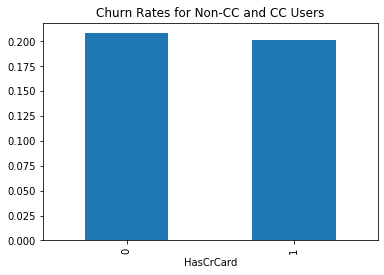

In [14]:
CrCardChurn = df.groupby("HasCrCard")["Exited"].agg("mean")
print(CrCardChurn)
CrCardChurn.plot(kind = "bar", title = "Churn Rates for Non-CC and CC Users")

Credit card users are less likely to churn than other users, though the difference is not necessarily significant.

In [15]:
#DONOT CHANGE THIS
df_train = df.sample(frac=0.8,random_state=11)
df_test = df.drop(df_train.index)

from sklearn.base import BaseEstimator, TransformerMixin
#We provide the required transformers to build the pipeline.
# Transfomer for performing one hot encoding on a specified categorical column
class OneHotEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self,col):
        self.col = col
                
    def transform(self, X):
        return pd.get_dummies(X[self.col]) 

    def fit(self, X, y=None):
        return self  
    
# Stateless transformer for selecting a specified columns
class DFSubsetSelector(BaseEstimator,TransformerMixin):
    
    def __init__(self,cols):
        self.cols = cols
        
    def transform(self ,X):
        return X[self.cols]
    
    def fit(self, X, y=None):
        return self
    
class ConcatFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self,cols,sep="_"):
        self.cols = cols
        self.sep = sep
                
    def transform(self, X):
        concat_col = self.sep.join(self.cols)
        return X.apply(lambda x : self.sep.join([x[col] for col in self.cols]) ,axis=1).to_frame(name = concat_col)

    def fit(self, X, y=None):
        return self  

#### (3)

In [ ]:
class MinMaxTransform(BaseEstimator, TransformerMixin):

    def __init__(self,cols=None):
        self.cols = cols
       
    def transform(self, X):
        

#     def fit(self, X, y=None):


#### (4)

#### (5)

#### (6)

#### (7)

#### (8)